## Supplementary material figures - A multiscale atlas of the molecular and cellular architecture of the human kidney 

This notebook is relevant to the following publication: "A multiscale atlas of the molecular and cellular architecture of the human kidney" by Elizabeth K. Neumann, Nathan Heath Patterson, Leonoor E.M. Tideman, 
Lukasz G. Migas, Madeline E. Colley, Melissa A. Farrow, Jamie L. Allen, Emilio S. Rivera, Carrie E. Romer, Haichun Yang, Maya Brewer, Kavya Sharman, Raymond C. Harris, Agnes B. Fogo, Danielle B. Gutierrez, 
Mark P. de Caestecker, Richard M. Caprioli, Raf Van de Plas, Jeffrey M. Spraggins. By running the following code, you can reproduce Figures S69, S70, S71, S72, S74, S75, S76, S77, S79, S80, S81, S82, S84, S85, S86, S87 in the supplementary material of the paper. 

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.collections
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.collections import PatchCollection
from matplotlib import colors
import math

In [2]:
# Figure aesthetics
choose_colormap = 'flare' # 'flare' or 'crest'
choose_frame = True # True or False
choose_grid = '0.9' # float between 0 (black) and 1 (white)

In [3]:
# Modality
mod = 'Positive'
#mod = 'Negative'

In [4]:
def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("Decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("Decimal places has to be zero or more.")
    elif decimals == 0:
        return math.trunc(number)
    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [5]:
# Chemical species names
if mod == 'Positive':
    mz_list = [622.4437,  650.4392, 650.4748, 675.5431, 678.4700, 682.4562, 697.4766, 701.5587, 703.5744, 706.4650, 706.5375, 720.5519, 720.5887, 721.4768, 723.4921, 725.5561, 729.5900, 
              730.5370, 731.6047, 732.5530, 734.4500, 734.5687, 739.4659, 741.53, 742.5726, 744.5886, 745.4766, 746.5684, 746.6045, 747.4914, 748.5830, 749.5072, 753.5864, 756.5513, 
              757.6211, 758.5688, 759.6372, 760.5838, 766.5731, 768.5875, 769.56, 772.5241, 772.5840, 774.5639, 774.5989, 778.5116, 780.5508, 782.5676, 784.5825, 785.6524, 786.5994, 
              787.6678, 790.5121, 796.5245, 796.5829, 798.5393, 804.5500, 806.5663, 808.5825, 809.6500, 810.5987, 811.6671, 813.6832, 815.6980, 816.5269, 818.5428]
    name_list = ['[PC(24:0)+H]+', '[PE(28:1;O)+H]+', '[PC(14:0_12:0)+H]+', '[SM(32:1;O2)+H]+', '[PE(30:1;O)+H]+', '[CerP(36:2;O2)+K]+', '[PA(34:1)+Na]+', '[SM(34:2;O2)+H]+', 
                '[SM(d34:1)+H]+', '[PS(30:1)+H]+', '[PC(30:0)+H]+', '[PE(34:0)+H]+', '[PC(O-32:0)+H]+', '[PA(36:3)+Na]+', '[PA(18:0_18:2)+Na]+', '[SM(d34:1)+Na]+', '[SM(36:2;O2)+H]+', 
                '[PC(32:2)+H]+', '[SM(d16:1_20:0)+H]+', '[PC(18:1_14:0)+H]+', '[PE(O-34:5)+K]+', '[PC(32:0)+H]+', '[PA(36:2)+K]+', '[SM(d34:1)+K]+', '[PC(P-34:2)+H]+', '[PC(O-34:2)+H]+', 
                '[PG(P-32:0)+K]+', '[PE(36:1)+H]+', '[PC(P-34:0)+H]+', '[PA(18:2_20:2)+Na]+', '[PE(36:0)+H]+', '[PA(38:3)+Na]+', '[SM(36:1;O2)+Na]+', '[PC(32:0)+Na]+', '[SM(38:2;O2)+H]+', 
                '[PC(34:2)+H]+', '[SM(38:1;O2)+H]+', '[PC(16:0_18:1)+H]+', '[PC(P-34:1)+Na]+', '[PC(P-34:0)+Na]+', '[SM(36:1;O2)+K]+', '[PC(32:0)+K]+', '[PE(38:2)+H]+', '[PS(O-16:0_20:2)+H]+',
                '[PE(38:1)+H]+', '[PC(O-34:4)+H]+', '[PC(34:2)+Na]+', '[PC(16:0_18:1)+Na]+', '[PC(16:0_18:0)+Na]+', '[SM(40:2;O2)+H]+', '[PC(18:0_18:2)+H]+', '[SM(40:1;O2)+H]+', 
                '[PE(O-18:0_20:5)+K]+', '[PC(34:2)+K]+', '[PE(38:1)+Na]+', '[PC(34:1)+K]+', '[PC(36:4)+Na]+', '[PC(36:3)+Na]+', '[PC(36:2)+Na]+', '[SM(40:1;O2)+Na]+', '[PC(36:1)+Na]+',
                '[SM(40:0;O2)+Na]+', '[SM(d42:2)+H]+', '[SM(d42:1)+H]+', '[PE(O-40:6)+K]+', '[PE(O-40:5)+K]+']

if mod == 'Negative':
    mz_list = [616.4748, 642.4900, 644.5045, 647.4684, 650.4063, 664.4200, 671.4678, 672.5352, 673.4830, 678.4366, 685.4830, 687.4992, 695.4670, 697.4821, 698.5508, 699.4978, 700.5019, 
               700.5657, 701.5132, 714.5090, 715.5100, 716.5240, 718.5388, 721.4819, 722.5131, 723.5000, 726.5808, 728.5260, 728.5955, 738.5080, 740.5219, 742.5389, 743.6076, 744.5539,
               747.5169, 748.5256, 750.5432, 754.6104, 760.5122, 762.5074, 764.5223, 766.5381, 769.6218, 770.5685, 771.6370, 778.5127, 782.4947, 786.5271, 788.5425, 790.5401, 792.5517,
               794.5085, 794.5673, 795.6362, 797.6518, 799.6664, 809.5152, 827.5580, 835.5304, 836.5344, 837.5400, 857.5100, 870.5974, 876.6184, 878.5980]
    name_list = ['[CerP(34:1;O2)-H]-', '[CerP(36:2;O2)-H]-', '[CerP(36:1;O2)-H]-', '[PA(32:0)-H]-', '[PS(26:0)-H]-', '[PAz-PC-H]-', '[PA(34:2)-H', '[CerP(38:1;O2)-H]-', 
                '[PA(34:1)-H]-', '[PS(28:0)-H]-', '[DG(42:11)-H]-', '[PA(19:1_16:0)-H]-', '[PA(36:4)-H]-', '[PA(18:2_18:1)-H]-', '[CerP(40:2;O2)-H]-', '[PA(36:2)-H]-', 
                '[HexCer(30:2;O4)-H]-', '[CerP(40:1;O2)-H]-', '[PA(36:1)-H]-', '[PE(34:2)-H]-', '[PA(O-20:0_18:1)-H]-', '[PE(16:0_18:1)-H]-', '[PE(34:0)-H]-', 
                '[PA(38:5)-H]-', '[PE(P-36:4)-H]-', '[PA(38:4)-H]-', '[CerP(42:2;O2)-H]-', '[CerP(40:3;O4)-H]-', '[CerP(d42:1)-H]-', '[PE(36:4)-H]-', '[PE(36:3)-H]-',
                '[PE(18:2_18:0)-H]-', '[PE-Cer(d18:0_22:1)-H]-', '[PE(36:1)-H]-', '[PG(34:1)-H]-', '[PE(P-38:5)-H]-', '[PE(P-38:4)-H]-', '[CerP(d44:2)-H]-', 
                '[PS(34:1)-H]-', '[PE(38:6)-H]-', '[PE(38:5)-H]-', '[PE(18:0_20:4)-H]-', '[TG(42:0;O3)-H]-', '[PE(18:2_20:0)-H]-', '[PE-Cer(d42:1)-H]-', 
                '[PE(16:1_22:5)-H]-', '[PS(36:4)-H]-', '[PS(36:2)-H]-', '[PS(18:1_18:0)-H]-', '[PE(40:6)-H]-', '[PE(40:5)-H]-', '[SHexCer(34:1;O3)-H]-', '[PE(40:4)-H]-',
                '[TG(44:1;O3)-H]-', '[PE-Cer(d44:2)-H]-', '[PE-Cer(d44:1)-H]-', '[PI(32:0)-H]-', '[PA(46:8)-H]-', '[PI(34:1)-H]-', '[PE(O-42:8)-H]-', '[PI(16:0_18:0)-H]-',
                '[PI(20:4_16:0)-H]-', '[PE(46:8)-H]-', '[HexCer(44:6;O5)-H]-', '[C22(OH) Sulfatide]-']
    
mz_list_Elizabeth = [truncate(num, 2) for num in mz_list]

#### Import data

In [6]:
# Basic info
num_ROIs = 4
num_datasets = 12
name_ROIs = ['Collecting ducts', 'Distal tubules', 'Proximal tubules', 'Glomeruli']

# Glomeruli 
import_scores_glomeruli = pd.read_csv('./Data_Summary_Plot/Importance_Glomeruli_' + mod)
import_intensities_glomeruli = pd.read_csv('./Data_Summary_Plot/Intensity_Glomeruli_' + mod)

# Proximal tubules
import_scores_proximal_tubules = pd.read_csv('./Data_Summary_Plot/Importance_Proximal_Tubules_' + mod)
import_intensities_proximal_tubules = pd.read_csv('./Data_Summary_Plot/Intensity_Proximal_Tubules_' + mod)

# Distal tubules
import_scores_distal_tubules = pd.read_csv('./Data_Summary_Plot/Importance_Distal_Tubules_' + mod)
import_intensities_distal_tubules = pd.read_csv('./Data_Summary_Plot/Intensity_Distal_Tubules_' + mod)

# Collecting ducts
import_scores_collecting_ducts = pd.read_csv('./Data_Summary_Plot/Importance_Collecting_Ducts_' + mod)
import_intensities_collecting_ducts = pd.read_csv('./Data_Summary_Plot/Intensity_Collecting_Ducts_' + mod)

# Molecular features
name_features = import_scores_glomeruli['m/z value'].to_numpy()
name_features = [truncate(num, 2) for num in name_features]
name_datasets = import_scores_glomeruli.columns[1:].to_list()[:num_datasets]
num_features = len(import_scores_glomeruli)
plot_loc = np.arange(num_features)

# Maximum intensity of each molecular feature
max_intensity_per_feature = pd.read_csv('./Data_Summary_Plot/Max_intensity_per_feature_' + mod).to_numpy()

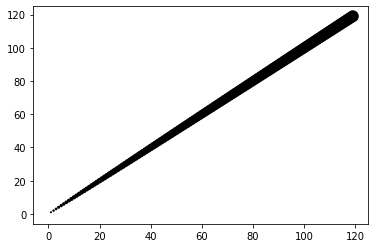

In [7]:
# Toy scatter plot (necessary for legend)
toy_data = np.array(list(range(0,120)))
toy_scatter = plt.scatter(x=toy_data, y=toy_data, s=toy_data, marker='o', c='k')

In [8]:
# Patient meta-data
meta_data = {'Total':' ', 'VAN0010-LK-152-8':'56/Male/White', 'VAN0012-RK-102-164':'44/Female/White', 'VAN0012-RK-102-167':'44/Female/White', 'VAN0013-LK-203-8':'61/Female/White', 
            'VAN0016-LK-203-68':'56/Male/White', 'VAN0028-LK-4-8':'56/Female/White', 'VAN0029-RK-2-82':'62/Male/White', 'VAN0030-LK-3-383': '43/Male/White',
            'VAN0031-LK-2-38': '77/Female/White', 'VAN0031-LK-3-63':'77/Female/White' , 'VAN0033-RK-2-66': '51/Female/White', 'VAN0034-RK-4-36':'57/Female/White'}

In [9]:
# Organize data
importance_per_dataset = {}
intensity_per_dataset = {}

# Global SHAP importance and intensity per sample for all tissue functional units
for dataset in name_datasets:
    importance_per_dataset[dataset] = np.vstack((import_scores_collecting_ducts[dataset], import_scores_distal_tubules[dataset], import_scores_proximal_tubules[dataset], import_scores_glomeruli[dataset]))
    intensity_per_dataset[dataset] = np.vstack((import_intensities_collecting_ducts[dataset], import_intensities_distal_tubules[dataset], import_intensities_proximal_tubules[dataset], import_intensities_glomeruli[dataset]))

#### Make figure

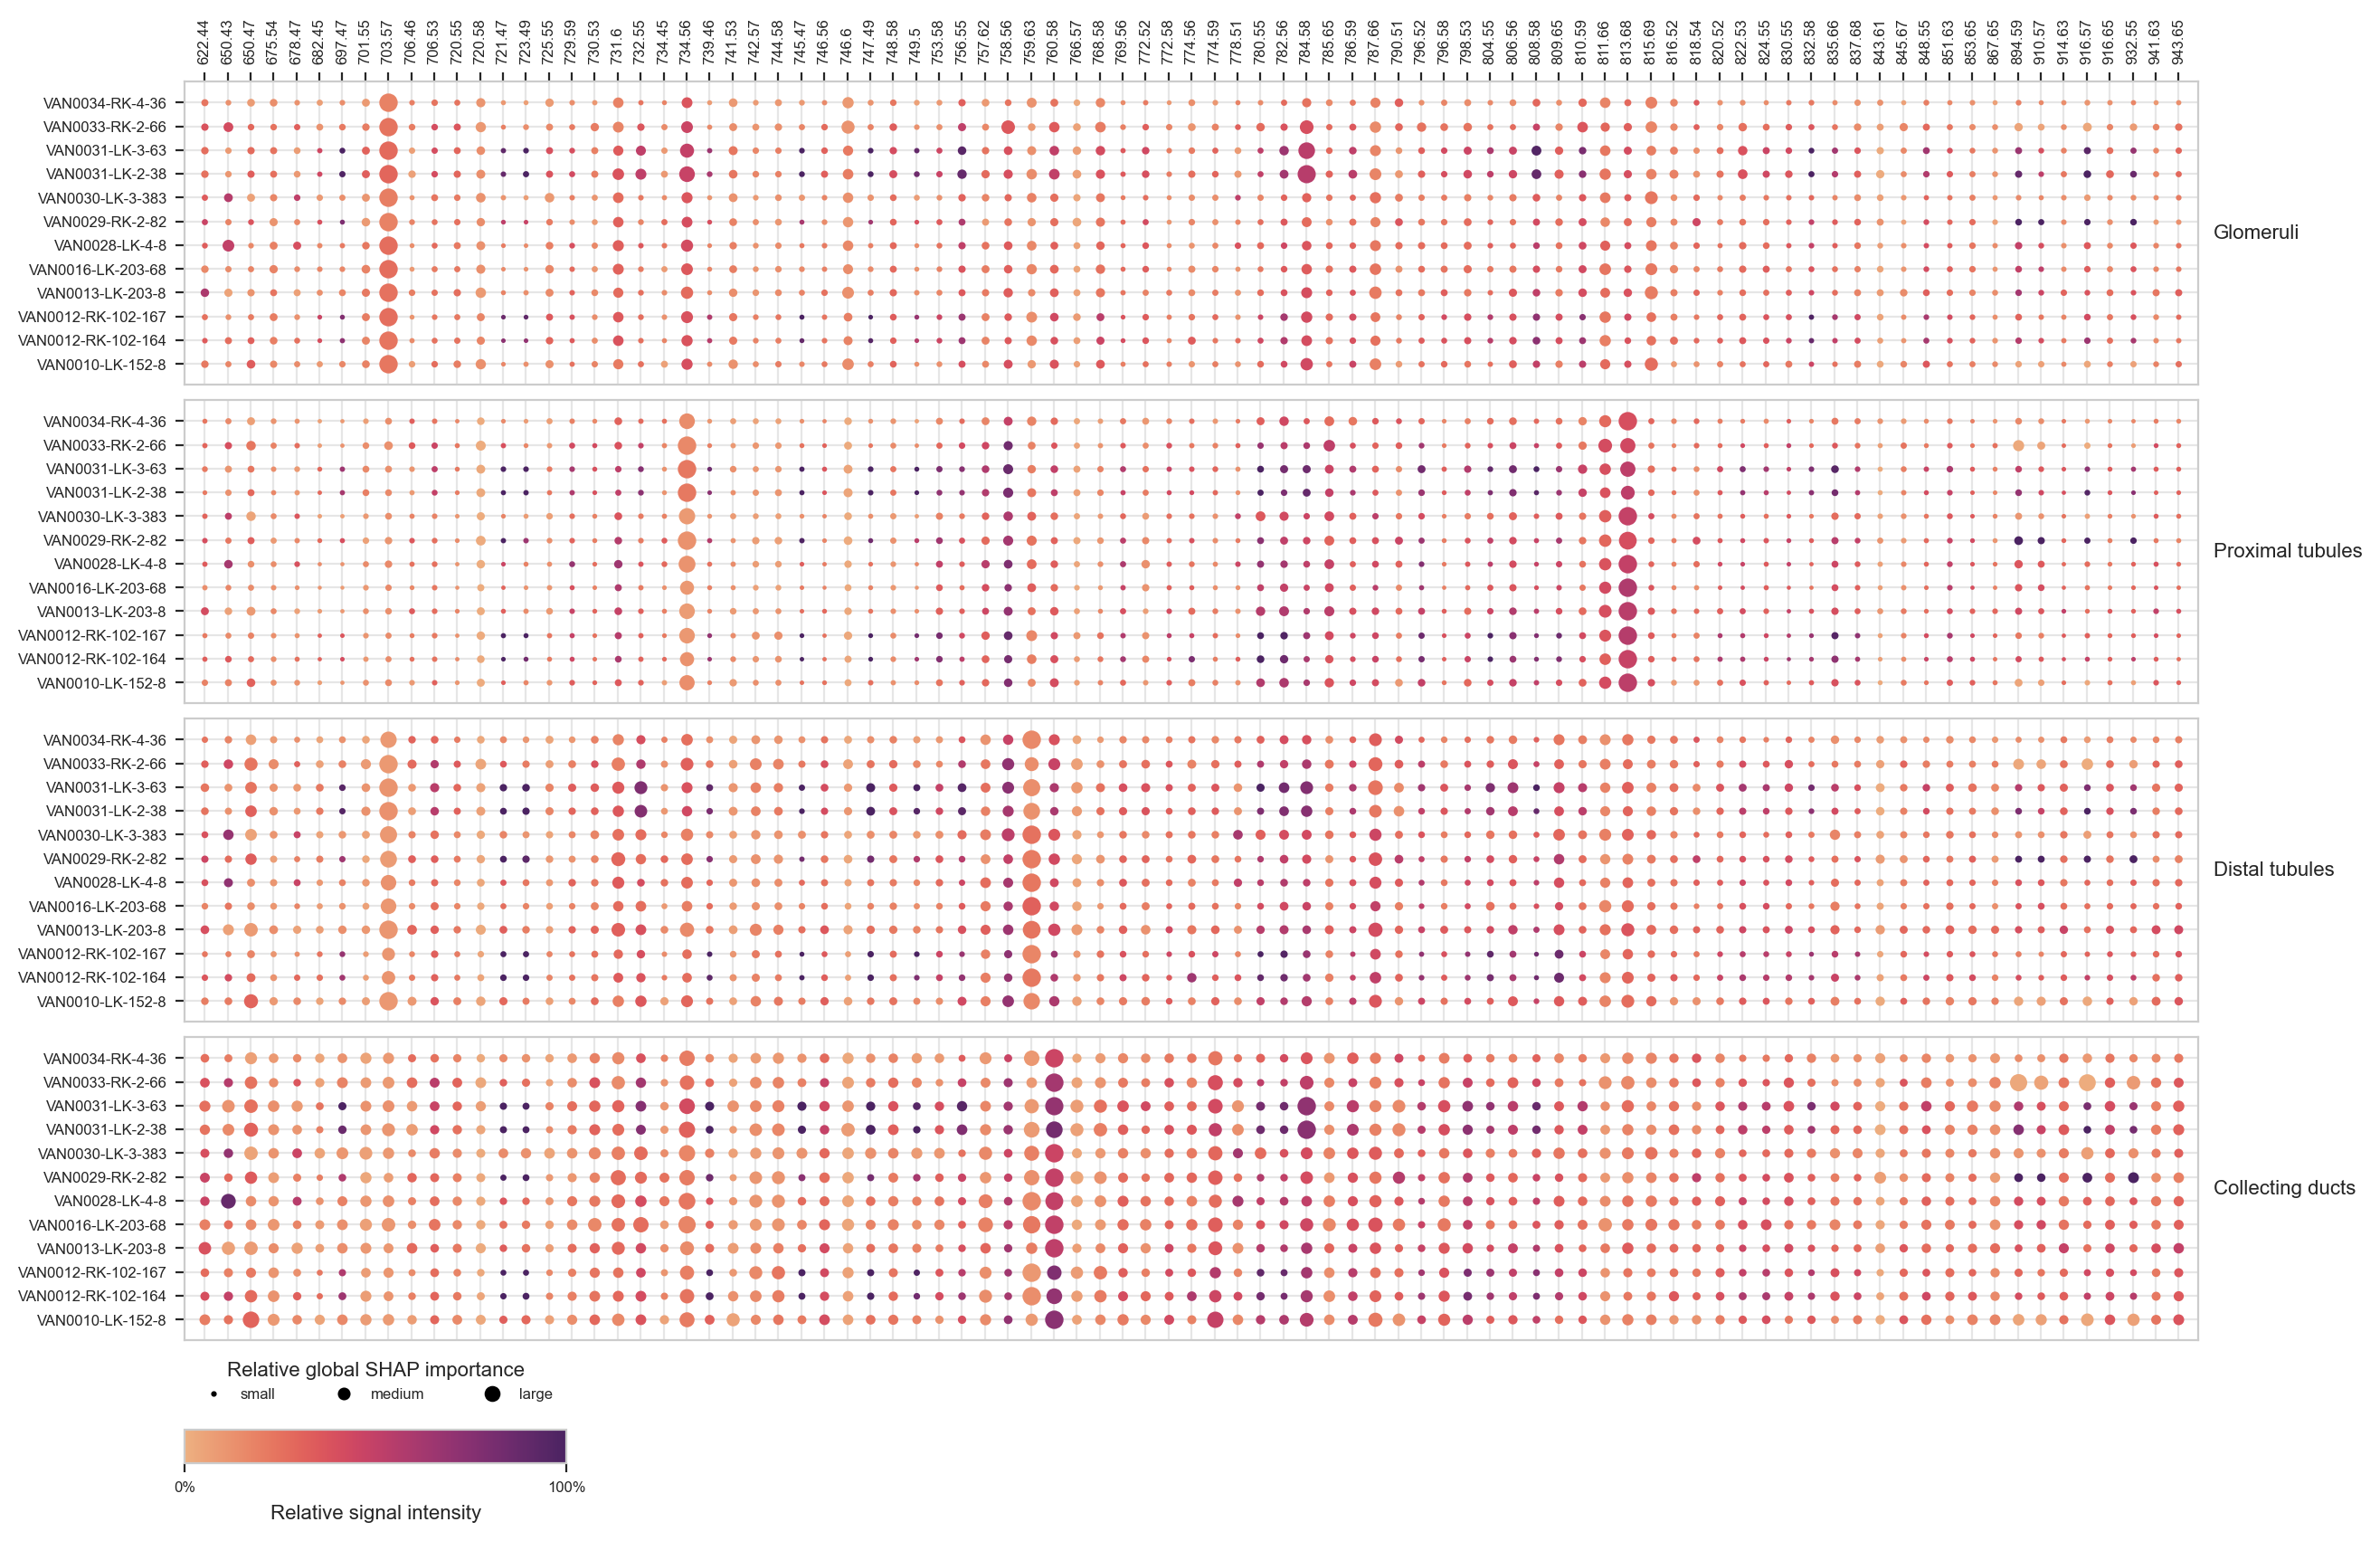

In [10]:
# Global SHAP importance and intensity per tissue functional units for all samples 
importance_per_dataset = {}
intensity_per_dataset = {}
importance_per_dataset['Collecting ducts'] = import_scores_collecting_ducts.iloc[:, 2:].transpose().to_numpy()
intensity_per_dataset['Collecting ducts'] = import_intensities_collecting_ducts.iloc[:, 2:].transpose().to_numpy()
importance_per_dataset['Distal tubules'] = import_scores_distal_tubules.iloc[:, 2:].transpose().to_numpy()
intensity_per_dataset['Distal tubules'] = import_intensities_distal_tubules.iloc[:, 2:].transpose().to_numpy()
importance_per_dataset['Proximal tubules'] = import_scores_proximal_tubules.iloc[:, 2:].transpose().to_numpy()
intensity_per_dataset['Proximal tubules'] = import_intensities_proximal_tubules.iloc[:, 2:].transpose().to_numpy()
importance_per_dataset['Glomeruli'] = import_scores_glomeruli.iloc[:, 2:].transpose().to_numpy()
intensity_per_dataset['Glomeruli'] = import_intensities_glomeruli.iloc[:, 2:].transpose().to_numpy()

# Total number of features
total_num_val = num_datasets*num_features

# Remove the total data
name_datasets = import_scores_collecting_ducts.columns[2:]
num_datasets = len(name_datasets)

num_datasets = 12
name_ROIs.reverse()
meta_rows = name_ROIs + [' ', ' ']
meta_fig = plt.figure(constrained_layout=True, figsize = (0.15*num_features,0.7*num_datasets), dpi=200)
meta_spec = meta_fig.add_gridspec(len(meta_rows), 4, width_ratios=[3, 7, 5, 1], height_ratios=[9]*len(name_ROIs) + [1, 1])
plt.rcParams['axes.xmargin'] = 0.01
plt.rcParams['axes.ymargin'] = 0.08
meta_fig.tight_layout(pad=1)

# Colormap and plotting style
my_circlecolor = sns.color_palette(choose_colormap, as_cmap=True)
sns.set_style('whitegrid', {'grid.color': choose_grid})

# Scaling factor for figure readability
alpha = 40

for meta_row_index, ROI_name in enumerate(meta_rows[:-2]):
    intensity_matrix = intensity_per_dataset[ROI_name]
    
    # Scale global SHAP importance scores per tissue functional unit (per row)
    max_importance_per_feature = np.amax(importance_per_dataset[ROI_name], axis=1)
    importance_matrix = alpha*importance_per_dataset[ROI_name]/max_importance_per_feature[:, None]

    # Plot
    if meta_row_index == 0:
        axes_summary_top = meta_fig.add_subplot(meta_spec[meta_row_index, 0:3])
        axes_summary_top.xaxis.tick_top()
        axes_summary_top.yaxis.tick_left()
        axes_summary_top.set_xticks(np.arange(num_features))
        axes_summary_top.set_yticks(np.arange(num_datasets))
        axes_summary_top.set_xticklabels(name_features, rotation=90, fontsize=6)
        axes_summary_top.set_yticklabels(name_datasets, fontsize=6)
        
        for index in range(total_num_val):
            div_num = int(index/num_features)
            modulo = index % num_features # colormap range
            val = importance_matrix[div_num,index-div_num*num_features] # importance & marker size
            color = intensity_matrix[div_num,index-div_num*num_features] # intensity & color
            scatter_plot = plt.scatter(plot_loc[index-div_num*num_features], div_num, s=val, c=color, marker='o', vmin=0, vmax=max_intensity_per_feature[modulo][0], cmap=my_circlecolor) 
    else:
        axes_summary = meta_fig.add_subplot(meta_spec[meta_row_index, 0:3], sharex=axes_summary_top)
        axes_summary.yaxis.tick_left()
        axes_summary.set_yticks(np.arange(num_datasets))
        axes_summary.set_yticklabels(name_datasets, fontsize=6)
        plt.setp(axes_summary.get_xticklabels(), visible=False)
        
        if choose_frame == False:
            sns.despine(left=True, bottom=True)
            
        for index in range(total_num_val):
            div_num = int(index/num_features)
            modulo = index % num_features # colormap range
            val = importance_matrix[div_num,index-div_num*num_features] # importance & marker size
            color = intensity_matrix[div_num,index-div_num*num_features] # intensity & color
            scatter_plot = plt.scatter(plot_loc[index-div_num*num_features], div_num, s=val, c=color, marker='o', vmin=0, vmax=max_intensity_per_feature[modulo][0], cmap=my_circlecolor) 

    # Tissue functional unit label
    axes_name = meta_fig.add_subplot(meta_spec[meta_row_index, 3])
    axes_name.annotate(ROI_name, (0, 0.5), xycoords='axes fraction', va='center', fontsize=8)
    axes_name.axis('off')
    
# Legend
axes_legend = meta_fig.add_subplot(meta_spec[len(meta_rows)-2, 0], )
handles, _ = toy_scatter.legend_elements(prop='sizes', num=20)
plt.legend([handles[0], handles[round(len(handles)/2)], handles[len(handles)-1]], ['small', 'medium', 'large'], loc='lower left', mode='expand', markerscale=0.5, ncol=3, title='Relative global SHAP importance', fontsize=6, title_fontsize=8, frameon=False)
axes_legend.axis('off') # remove x and y axes without removing legend
axes_empty = meta_fig.add_subplot(meta_spec[len(meta_rows)-2, 1])
axes_empty.remove()

# Colorbar
axes_colorbar = meta_fig.add_subplot(meta_spec[len(meta_rows)-1, 0], )
colorbar = plt.colorbar(scatter_plot, cax=axes_colorbar, orientation='horizontal')
colorbar.set_label('Relative signal intensity', size=8)
colorbar.set_ticks([0, max_intensity_per_feature[-1][0]])
colorbar.ax.set_xticklabels(['0%', '100%'], fontsize=6)
axes_empty_bis = meta_fig.add_subplot(meta_spec[len(meta_rows)-1, 1]) 
axes_empty_bis.remove()

plt.show()
meta_fig.savefig('C:/Users/Leo/Desktop/Figure_group_by_tissue_function_unit_' + mod + '_' + choose_colormap + '.png', bbox_inches='tight')